## Probability Calibration

The goal of this notebook is to investigate the accuracy of the model's reported probabilities. Methods of calibrating models will also be explored.

One method to visualise the accuracy of probabilities is to use a calibration curve. A calibration curve plots observed frequency against the predicited probability. If a model's prediction matches reality perfectly, the curve should be a perfect y = x line.

In [8]:
# importing dataset
import sys, os

# Project root: /Users/jaydenshi/Documents/Code/Projects/atp-forecaster
PROJECT_ROOT = os.path.abspath("../..")

# Add src/ to sys.path so `atp_forecaster` is importable
SRC_ROOT = os.path.join(PROJECT_ROOT, "src")
if SRC_ROOT not in sys.path:
    sys.path.insert(0, SRC_ROOT)

from atp_forecaster.data import load_processed

from sklearn.model_selection import train_test_split

X, y = load_processed()

test_size = 0.2
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, shuffle=False)

In [9]:
import matplotlib.pyplot as plt
from sklearn.calibration import CalibrationDisplay

def produce_calibration_curve(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)

    y_proba = model.predict_proba(x_test)[:, 1]

    disp = CalibrationDisplay.from_predictions(
        y_test,
        y_proba,
        n_bins=50,
        strategy="uniform"
    )

    plt.title("Calibration curve")
    plt.grid(True)
    plt.show()

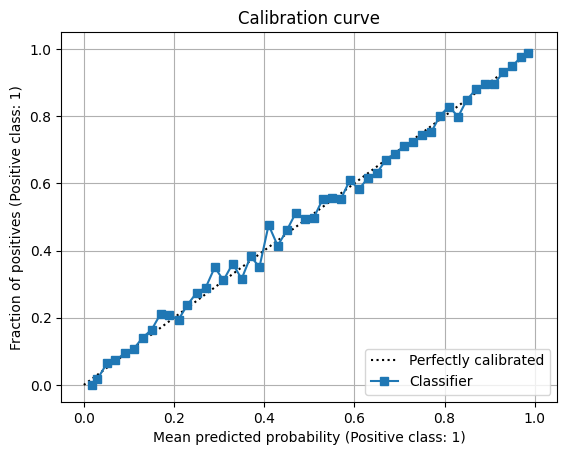

In [ ]:
import pickle
from sklearn.base import clone

with open("../../models/xgb_v1.pkl", "rb") as f:
    model = clone(pickle.load(f))

produce_calibration_curve(model, x_train, x_test, y_train, y_test)